## IMPORTS and FUNCTIONS

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import regex as re

In [4]:
folder_path = '../raw_data/UTKFace'

In [18]:
def load_images_from_folder(folder_path):
    filenames = [f for f in os.listdir(folder_path) if not f.startswith('.')]
    filenames.sort(key=lambda f: int(re.sub('\D', '', f)))
    images = []
    for filename in filenames:
        if filename.startswith('80'):
            break
        img_cv = cv2.imread(os.path.join(folder_path,filename))
        if img_cv is not None:
            img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

def show_all_images_from_list(img_list,img_df):
    n=int(len(img_list)/5) +1 
    f = plt.figure(figsize=(25,n*5))
    for i,img in enumerate(img_list):
        f.add_subplot(n, 5, i + 1)
        plt.title(f'Age: {img_df.iloc[i]["age"]}; Race: {img_df.iloc[i]["race"]}',
                  fontweight="bold",fontsize=15)
        plt.imshow(img)

def load_image_data_into_dataframe(folderpath):

    filenames = [f for f in os.listdir(folder_path) if not f.startswith('.')]
    filenames.sort(key=lambda f: int(re.sub('\D', '', f)))
    df = pd.DataFrame()
    for filename in filenames:
        if filename.startswith('80'):
            break
        parsed_name = filename.split('_')
        df= df.append({'age' : int(parsed_name[0]),
                       'gender' : parsed_name[1],
                       'race' : parsed_name[2]}, ignore_index=True)
    df['gender'] = df['gender'].map({'0': 'male', '1': 'female'})
    df['race'] = df['race'].map({'0': 'White', '1': 'Black', '2': 'Asian', '3': 'Indian', '4': 'Others'})
    return df

In [6]:
img_pic=load_images_from_folder(folder_path)

In [7]:
len(img_pic)

23032

In [19]:
img_df = load_image_data_into_dataframe(folder_path)

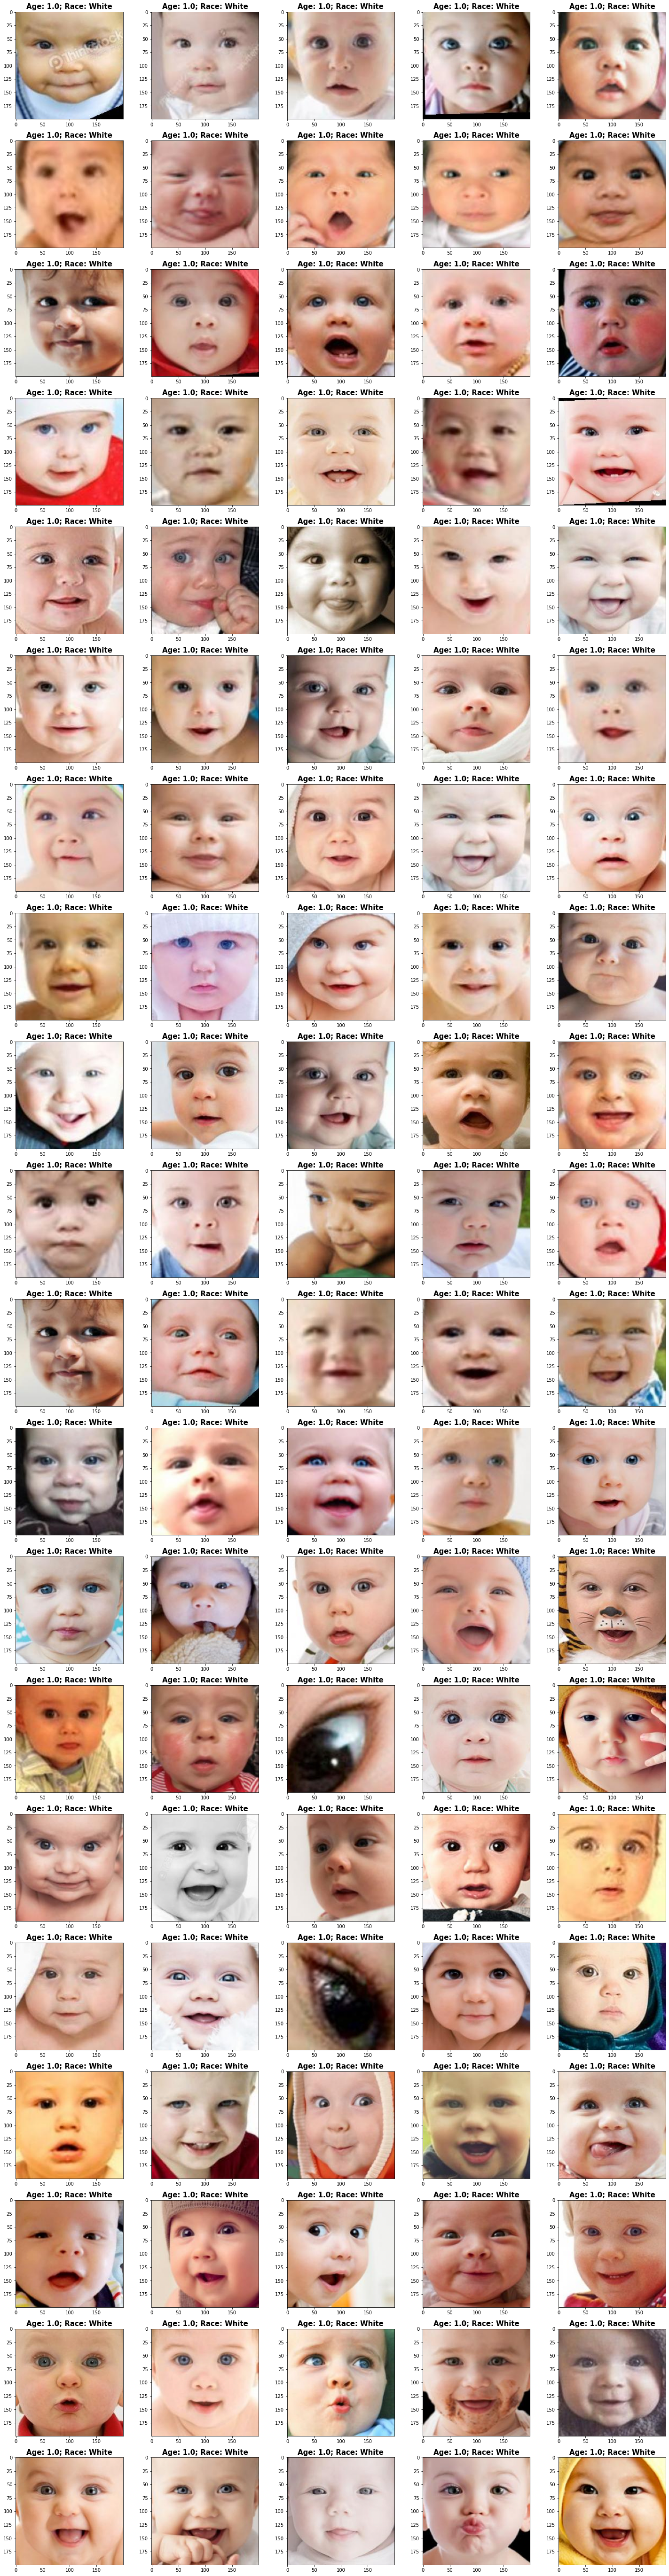

In [20]:
show_all_images_from_list(img_pic[:100],img_df[:100])

In [21]:
img_df.shape

(23032, 3)

In [22]:
img_df.tail()

age  gender   race
23027  79.0  female  White
23028  79.0  female  White
23029  79.0  female  White
23030  79.0  female  White
23031  79.0  female  Asian

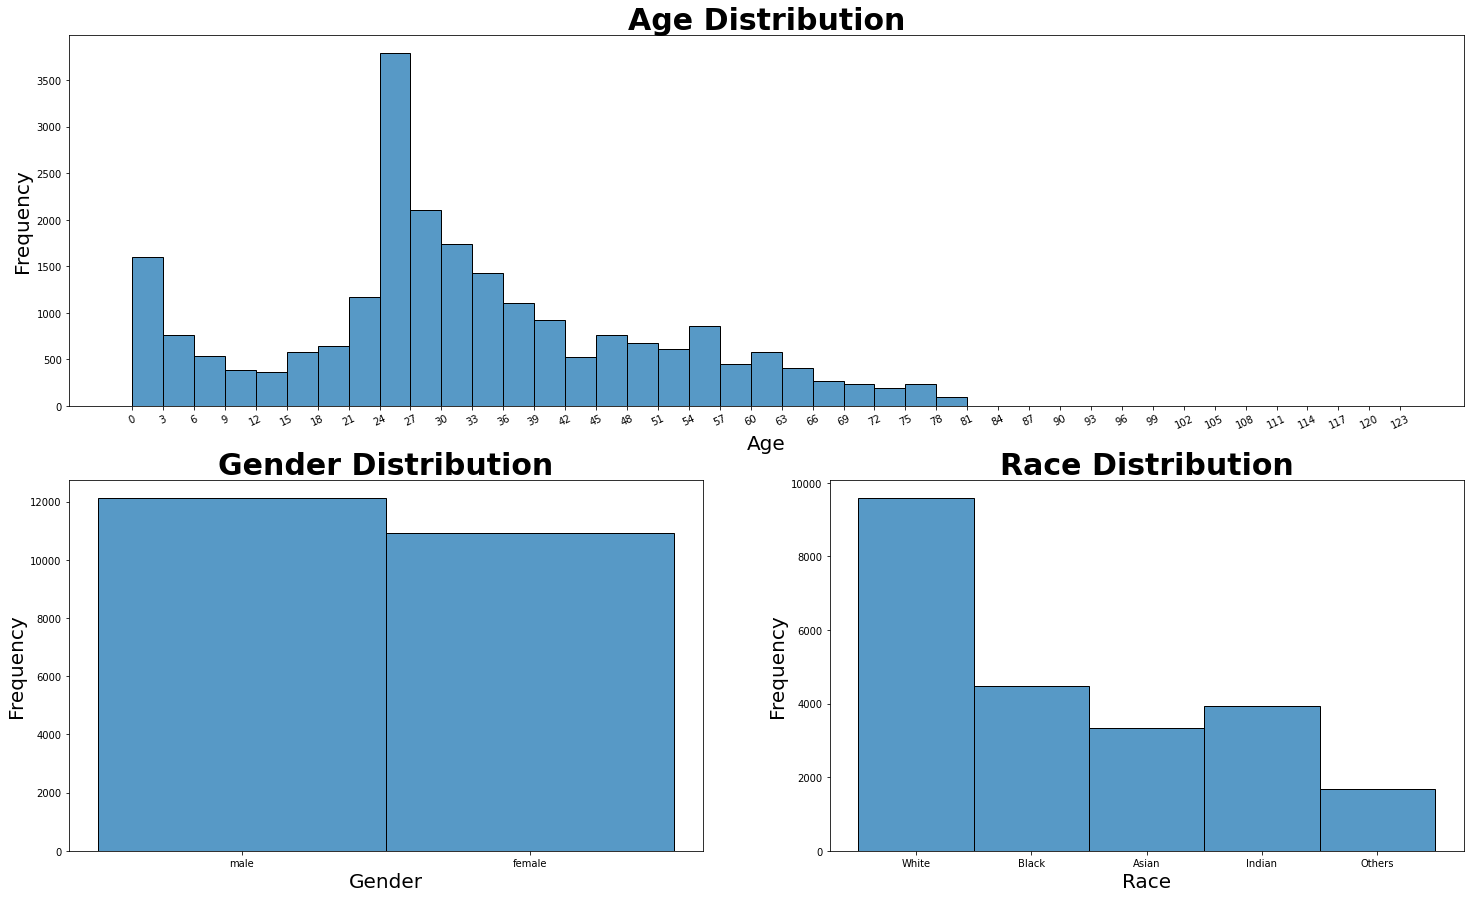

In [23]:
f = plt.figure(figsize=(25,15))
#bins_value=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
bins_value = list(range(0,125,3))

#Age Histogram
f.add_subplot(211)
sns.histplot(data=img_df,x = 'age', bins=bins_value)
plt.title('Age Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(bins_value, rotation = 25)

# Gender Histogram
f.add_subplot(223)
sns.histplot(img_df['gender'])
plt.title('Gender Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

#Race Histogram
f.add_subplot(224)
sns.histplot(img_df['race'])
plt.title('Race Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Race',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks()

plt.show()